In [1]:
from pyscf import gto, scf, mcscf, fci
import numpy as np
import matplotlib.pyplot as plt
from pyblock2._pyscf.ao2mo import integrals as itg
from pyblock2.driver.core import DMRGDriver, SymmetryTypes
import os 

Use this to delete the temp files BEFORE a dmrg calculation

In [18]:
folder_path = "./tmpheh"  #change here the directory where the tmp files are located

for filename in os.listdir(folder_path):
        file_path = os.path.join(folder_path, filename)
        
        # Check if it's a file (not a directory) and delete it
        if os.path.isfile(file_path):
            os.remove(file_path)
            print(f"Deleted: {file_path}")

Deleted: ./tmpheh/F.MPS.GS.0
Deleted: ./tmpheh/F.MPS.GS.1
Deleted: ./tmpheh/F.MPS.INFO.GS.LEFT.0
Deleted: ./tmpheh/F.MPS.INFO.GS.RIGHT.0
Deleted: ./tmpheh/F.MPS.INFO.GS.LEFT.1
Deleted: ./tmpheh/F.MPS.INFO.GS.RIGHT.1
Deleted: ./tmpheh/F.MPS.INFO.GS.LEFT.2
Deleted: ./tmpheh/F.MPS.INFO.GS.RIGHT.2
Deleted: ./tmpheh/F.MPS.GS.-1
Deleted: ./tmpheh/GS-mps_info.bin


In [4]:
#Helium-hydrogen test test

heh = gto.M(atom=[["He", 0, 0, 0],
                  ["H", 1.0, 0, 0]], unit = 'Bohr', basis = '6-31g', charge = 0, spin = 1)
uhf_heh=scf.UHF(heh)
uhf_heh.kernel()
norbs, nelecas = (4, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_heh, norbs, nelecas).mc1step()[0]


Heh_alpha_mo_en = uhf_heh.mo_energy[0]
Heh_beta_mo_en = uhf_heh.mo_energy[1]
Heh_alpha_mo_coeff = uhf_heh.mo_coeff[0]
Heh_beta_mo_coeff = uhf_heh.mo_coeff[1]
Heh_alpha_occ=uhf_heh.mo_occ[0]
Heh_beta_occ=uhf_heh.mo_occ[1]

print(Heh_alpha_mo_en)
print(Heh_beta_mo_en)
#print(Heh_alpha_occ)
#print(Heh_beta_occ)
print(Heh_alpha_mo_coeff)
print(Heh_beta_mo_coeff)


#np.save('/workspaces/MRA-OrbitalOptimization/Block2/HeH_test/coeffs/120_alphacoeffs.npy', Heh_alpha_mo_coeff)
#np.save('/workspaces/MRA-OrbitalOptimization/Block2/HeH_test/coeffs/120_betacoeffs.npy', Heh_beta_mo_coeff)

converged SCF energy = -2.9832862906499  <S^2> = 0.75016753  2S+1 = 2.0001675
UCASSCF energy = -3.00036545077106
UCASCI E = -3.00036545077106  E(CI) = -5.00036545077106  S^2 = 0.7500000
[-1.4449063  -0.15069456  0.78469788  1.65606761]
[-1.37397819  0.29320459  0.81722386  1.74214313]
[[ 0.61943106 -0.25477519  0.20543507 -1.23775433]
 [ 0.27941669 -1.13998599 -1.11478455  1.68503629]
 [ 0.25541189  0.24808759  1.20783956  0.71935548]
 [-0.0085387   1.57115942 -0.28616908 -1.27985206]]
[[ 0.60515623 -0.21474562 -0.23640786 -1.24684648]
 [ 0.30980175 -1.12967128  1.24404715  1.5937208 ]
 [ 0.26258022  0.14659769 -1.19325945  0.76734869]
 [-0.03651513  1.63361992  0.14189624 -1.22406981]]


In [2]:
#FCI Referenz
energy_fci = []

for i in np.arange(1.2, 7.1, 0.1):
    Heh_fci = gto.M(atom=[["He", 0, 0, 0],
                        ["H", i, 0, 0]], unit = 'Bohr', basis = 'cc-pvtz', charge = 0, spin = 1)
    uhf_hehfci=scf.UHF(Heh_fci)
    uhf_hehfci.kernel()
    fcisolver = fci.FCI(uhf_hehfci)
    energy_fci.append(fcisolver.kernel()[0])


converged SCF energy = -3.13179018978606  <S^2> = 0.75055751  2S+1 = 2.0005574
converged SCF energy = -3.16484302194819  <S^2> = 0.75067565  2S+1 = 2.0006755
converged SCF energy = -3.19216039605144  <S^2> = 0.75078489  2S+1 = 2.0007847
converged SCF energy = -3.21519572472312  <S^2> = 0.75087761  2S+1 = 2.0008774
converged SCF energy = -3.23488097914621  <S^2> = 0.75094658  2S+1 = 2.0009464
converged SCF energy = -3.25184441432973  <S^2> = 0.75098648  2S+1 = 2.0009862
converged SCF energy = -3.26653453099571  <S^2> = 0.75099499  2S+1 = 2.0009947
converged SCF energy = -3.27929077020825  <S^2> = 0.75097334  2S+1 = 2.0009731
converged SCF energy = -3.29038289604833  <S^2> = 0.75092583  2S+1 = 2.0009256
converged SCF energy = -3.30003282294793  <S^2> = 0.75085869  2S+1 = 2.0008585
converged SCF energy = -3.30842720748585  <S^2> = 0.75077878  2S+1 = 2.0007786
converged SCF energy = -3.31572533602107  <S^2> = 0.75069252  2S+1 = 2.0006924
converged SCF energy = -3.32206454674157  <S^2> = 0.

In [5]:
Heh_fci = gto.M(atom=[["He", 0, 0, 0],
                      ["H", 7.1, 0, 0]], unit = 'Bohr', basis = 'cc-pvtz', charge = 0, spin = 1)
uhf_hehfci=scf.UHF(Heh_fci)
uhf_hehfci.kernel()
fcisolver = fci.FCI(uhf_hehfci)
energy_fci.append(fcisolver.kernel()[0])

converged SCF energy = -3.36095697274752  <S^2> = 0.75000001  2S+1 = 2


In [15]:
heh = gto.M(atom=[["He", 0, 0, 0],
                  ["H", 1.2, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
uhf_heh=scf.UHF(heh)
uhf_heh.kernel()

norbs, nelecas = (2, (2, 1))
ref_ucas = mcscf.UCASSCF(uhf_heh, norbs, nelecas).mc1step()[0]

bond_dims = [250] * 8
noises = [1e-4] * 4 + [1e-5] * 4 + [0]
thrds = [1e-10] * 8
ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf_heh,
    ncore=0, ncas=None, g2e_symm=1)


driver_631g = DMRGDriver(scratch="./tmpheh", symm_type=SymmetryTypes.SZ, n_threads=4)
driver_631g.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)

mpo_631g = driver_631g.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=1)
ket_631g = driver_631g.get_random_mps(tag="GS", bond_dim=250, nroots=1)
energy_631g = driver_631g.dmrg(mpo_631g, ket_631g, n_sweeps=10, bond_dims=bond_dims, noises=noises,
    thrds=thrds, iprint=1)
print('DMRG energy = %20.15f' % energy_631g)
print('difference dmrg UCASSCF', ref_ucas - energy_631g)

converged SCF energy = -3.21609329134427  <S^2> = 0.75  2S+1 = 2
UCASSCF energy = -3.21609329134427
UCASCI E = -3.21609329134427  E(CI) = -4.09805530954427  S^2 = 0.7500000
integral symmetrize error =  0.0
integral cutoff error =  0.0
mpo terms =         54

Build MPO | Nsites =     2 | Nterms =         54 | Algorithm = FastBIP | Cutoff = 1.00e-20
 Site =     0 /     2 .. Mmpo =    22 DW = 0.00e+00 NNZ =       22 SPT = 0.0000 Tmvc = 0.000 T = 0.001
 Site =     1 /     2 .. Mmpo =     1 DW = 0.00e+00 NNZ =       22 SPT = 0.0000 Tmvc = 0.000 T = 0.001
Ttotal =      0.003 Tmvc-total = 0.000 MPO bond dimension =    22 MaxDW = 0.00e+00
NNZ =           44 SIZE =           44 SPT = 0.0000



Rank =     0 Ttotal =      0.007 MPO method = FastBipartite bond dimension =      22 NNZ =           44 SIZE =           44 SPT = 0.0000

Sweep =    0 | Direction =  forward | Bond dimension =  250 | Noise =  1.00e-04 | Dav threshold =  1.00e-10
Time elapsed =      0.025 | E =      -3.2160932913 | DW = 0.00000e+00

Sweep =    1 | Direction = backward | Bond dimension =  250 | Noise =  1.00e-04 | Dav threshold =  1.00e-10
Time elapsed =      0.048 | E =      -3.2160932913 | DE = 0.00e+00 | DW = 0.00000e+00

Sweep =    2 | Direction =  forward | Bond dimension =  250 | Noise =  1.00e-04 | Dav threshold =  1.00e-10
Time elapsed =      0.073 | E =      -3.2160932913 | DE = 0.00e+00 | DW = 0.00000e+00

Sweep =    3 | Direction = backward | Bond dimension =  250 | Noise =  1.00e-04 | Dav threshold =  1.00e-10
Time elapsed =      0.099 | E =      -3.2160932913 | DE = 0.00e+00 | DW = 0.00000e+00

Sweep =    4 | Direction =  forward | Bond dimension =  250 | Noise =  1.00e-05 | Dav threshold = 

In [2]:
heh = gto.M(atom=[["He", 0, 0, 0],
                  ["H", 1.0, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1)
uhf_heh=scf.UHF(heh)
uhf_heh.kernel()

Heh_alpha_mo_coeff = uhf_heh.mo_coeff[0]
Heh_beta_mo_coeff = uhf_heh.mo_coeff[1]

print(Heh_alpha_mo_coeff)
print(Heh_beta_mo_coeff)



converged SCF energy = -3.1578592138  <S^2> = 0.75  2S+1 = 2
[[ 0.89817854 -0.61217651]
 [ 0.21117883  1.06624963]]
[[ 0.95022939 -0.52777729]
 [ 0.11313171  1.08105781]]


In [2]:
diff = -3.216093291344268 + 3.21607912659261
print(diff)

-1.4164751658274355e-05


Dissociation curve He-H of UHf

In [2]:
Euhf_heh = []



#bond_dims = [50] * 10
#noises = [1e-4] *  5 + [1e-5] * 5 + [0]
#thrds = [1e-10] * 10

for a in np.arange(0.5, 7, 0.1):
    Heh = gto.M(atom=[["He", 0, 0, 0],
                      [ "H", a, 0, 0]], basis = 'sto-3g', charge = 0, spin = 1, unit='Bohr')
    uhf =scf.UHF(Heh)
    Euhf_heh.append(uhf.kernel())
    
    #ncas, n_elec, spin, ecore, h1e, g2e, orb_sym = itg.get_uhf_integrals(uhf,
    #ncore=0, ncas=None, g2e_symm=8)
    #dmrg_driver = DMRGDriver(scratch="./tmp", symm_type=SymmetryTypes.SZ, n_threads=4)
    #dmrg_driver.initialize_system(n_sites=ncas, n_elec=n_elec, spin=spin, orb_sym=orb_sym)
    #mpo = dmrg_driver.get_qc_mpo(h1e=h1e, g2e=g2e, ecore=ecore, iprint=0)
    #ket = dmrg_driver.get_random_mps(tag="GS", bond_dim=10, nroots=1)
    #energy = dmrg_driver.dmrg(mpo, ket, n_sweeps=15, bond_dims=bond_dims, noises=noises,
    #thrds=thrds, cutoff=0, iprint=0)
    #Edmrg_H2.append(energy)

converged SCF energy = -0.981871090413472  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -1.53194903823921  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -1.9246079234282  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.21529359790484  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.43524266483413  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.60402096752108  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.7348427991196  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.83711206976519  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.91773574934364  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -2.98185893674057  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.03332427534888  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.07499588737651  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.10900679668694  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.13695188610578  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.16003547080316  <S^2> = 0.75  2S+1 = 2
converged SCF energy = -3.

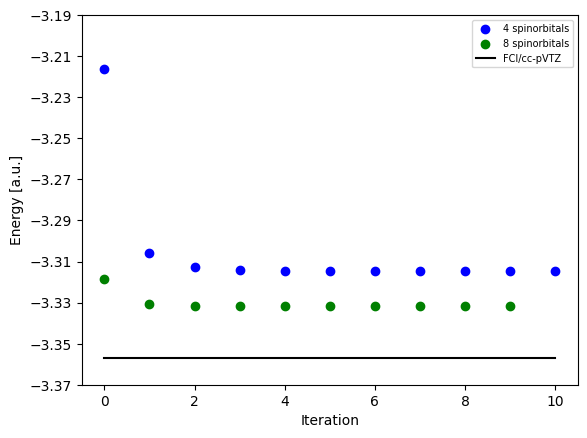

In [25]:
x = np.arange(0, 10, 1)
x2 = np.arange(0, 11, 1)
energy_631g = [-3.318389, -3.330713, -3.331502, -3.331640, -3.331673, -3.331683, -3.331686, -3.331688, -3.331688, -3.331688]
energy_sto3g = [-3.216079, -3.305759, -3.312885, -3.314307, -3.314675, -3.314786, -3.314824, -3.314837, -3.314842, -3.314844, -3.314844]
energy_fci = np.full(11, -3.3570239958160712)

fig, ax = plt.subplots()
#ax.scatter(x, Euhf_heh, color='blue', label='UHF HeH STO-3G')
ax.scatter(x2, energy_sto3g, color='blue', label='4 spinorbitals')
ax.scatter(x, energy_631g, color='green', label='8 spinorbitals')
ax.plot(x2, energy_fci, color='black', label='FCI/cc-pVTZ')
ax.legend(loc='upper right', fontsize=7)

ax.set_xlabel('Iteration')
ax.set_ylabel('Energy [a.u.]')
#ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(-3.19, -3.37, -0.02))

plt.show()

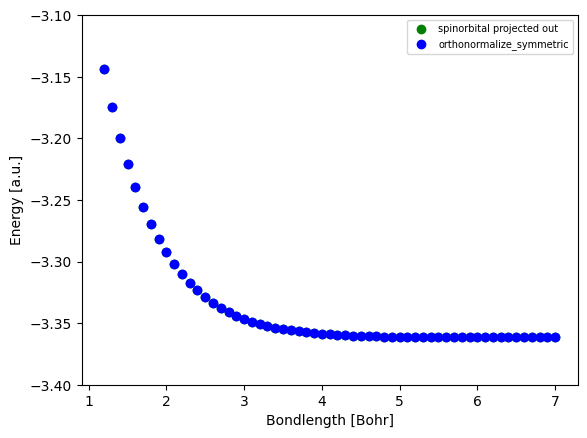

In [12]:
sto3g_init_energy = [-2.837093967040496, -2.9177185346883423, -2.9818421854105552, -3.03330800393587, -3.074980066743456, -3.1089914367914857, -3.136936919129891, -3.1600193450247795,
                     -3.1791648533054473, -3.1950904255520602, -3.20836493788789, -3.2194454001688784, -3.2287032897536427, -3.2364414147108027, -3.2429095450965346, -3.248313932543595, -3.252826517860797, 
                     -3.2565901206757664, -3.259724460599358, -3.2623303326484923, -3.264492664008085, -3.2662832072893266, -3.267762670203637, -3.268982140479504, -3.2699855087384284, 
                     -3.270808924688602, -3.2714832519055124, -3.2720341318502975, -3.272483850821257, -3.2728494653132865, -3.2731462809486227, -3.273386589556032, -3.273581194674879, 
                     -3.2737379610955757, -3.273864131339876, -3.2739653839270404, -3.274046439217869, -3.2741111215036653, -3.2741625124232314, -3.2742034053543265, -3.274236470088293, 
                     -3.274262450405211, -3.2742824625635887, -3.2742963538237673, -3.2743093154378213, -3.274319295838079, -3.2743269580530474, -3.274326795825329, -3.274332989045309, 
                     -3.2743376360418472, -3.2743412011911577, -3.2743440008714266, -3.274346194042887, -3.2743478866533406, -3.2743490059493476, -3.2743500087100923, -3.2743508731812385,
                     -3.274351384220274, -3.274351554337618]
sto3g_refined_energy =[-3.144093521539273, -3.1744546427331217, -3.1996077270296923, -3.220976188628213, -3.2394073292582366, -3.2554369521873148, -3.2694331275612303, -3.281674254253601, 
                       -3.292381603634398, -3.3017416239745, -3.309914791421201, -3.3170413052630034, -3.3232450425331077, -3.3286370125496125, -3.3333145191198956, -3.3373643683506504, -3.340865312694047, 
                       -3.343884021617482, -3.34648529569259, -3.3487216747361988, -3.3506414564569122, -3.352287028277499, -3.3536947069047818, -3.3548966457099443, -3.3559219418336808,
                       -3.356795240008779, -3.3575378030948757, -3.3581665706558894, -3.358701711727242, -3.359155210981916, -3.3595385116896925, -3.359862542757555, -3.3601364236869378, 
                       -3.360367040252824, -3.3605609825455347, -3.360724451036981, -3.36086180616565, -3.360977264204111, -3.3610749098847004, -3.3611555769649937, -3.361223050613116, 
                       -3.3612795641536763, -3.361325437106495, -3.3613659857393987, -3.3613993517860505, -3.361421010173911, -3.3614455496792846, -3.361466254484854, -3.361483265720863, 
                       -3.3614972454434278, -3.3615090406386914, -3.361518714796306, -3.3615266376695336, -3.361533291576843, -3.361538768179214, -3.3615432011186783, -3.361547122278753, 
                       -3.3615501124712703, -3.361552903651302]
sto3g_refined_energy_orthosym = [-3.1440527872588673, -3.1744581813467034, -3.1996348256580682, -3.221011950144206, -3.2394431106814965, -3.255466746283077, -3.269454828260189, -3.281687188491804,
                                 -3.2923861608703633, -3.3017389721136836, -3.309906655224395, -3.3170293615991118, -3.3232302729673364, -3.328620733358556, -3.33329789222847, -3.337348113216682,
                                 -3.3408498734862895, -3.3438713018170576, -3.3464718897542376, -3.3487098744539843, -3.3506304278869856, -3.3522767264024846, -3.353685866875976, -3.3548887492362116,
                                 -3.355914986834458, -3.3567888065319345, -3.35753199236248, -3.3581633000263302, -3.358698606781149, -3.3591504950218534, -3.3595343889136475, -3.3598587792047736,
                                 -3.36013279000446, -3.360363669684116, -3.360558054299459, -3.360721777048615, -3.3608593435427365, -3.3609750071758873, -3.3610720300343333, -3.3611532047208947,
                                 -3.361221307890701, -3.361279088368317, -3.3613262291584762, -3.361365942266918, -3.3613988026023005, -3.3614249666817515, -3.361448368450016, -3.3614682237109146,
                                 -3.3614846321745535, -3.361498126060915, -3.3615039528089685, -3.361514442829761, -3.3615230664601885, -3.361530431529297, -3.3615363596196897, -3.36154093095855,
                                 -3.361545033349664,-3.361548409201633, -3.361551767759356]

x = np.arange(1.2, 7.1, 0.1)


fig, ax = plt.subplots()
#ax.scatter(x, sto3g_init_energy, color='blue', label='initial energy (4 spin orbitals)')
ax.scatter(x, sto3g_refined_energy, color='green', label='spinorbital projected out')
ax.scatter(x, sto3g_refined_energy_orthosym, color = 'blue', label='orthonormalize_symmetric')
#ax.scatter(x, energy_fci, color='black', label='FCI/cc-pVTZ')


ax.legend(loc='upper right', fontsize=7)

ax.set_xlabel('Bondlength [Bohr]')
ax.set_ylabel('Energy [a.u.]')
#ax.set_xticks(np.arange(0.8, 4.4, 0.4))
ax.set_yticks(np.arange(-3.1, -3.43, -0.05))

plt.show()







In [9]:
difference_ortho = []
x=0
for i in sto3g_refined_energy:
    difference = i - sto3g_refined_energy_orthosym[x]
    difference_ortho.append(difference)
    x= x+1

print(difference_ortho)

[-4.0734280405629875e-05, 3.5386135817105924e-06, 2.709862837591004e-05, 3.5761515992938087e-05, 3.578142325988409e-05, 2.9794095762092354e-05, 2.1700698958682096e-05, 1.2934238203143877e-05, 4.557235965485518e-06, -2.6518608162717783e-06, -8.136196806063367e-06, -1.1943663891678113e-05, -1.476956577128874e-05, -1.6279191056511877e-05, -1.662689142545304e-05, -1.625513396863454e-05, -1.5439207757594886e-05, -1.2719800424498828e-05, -1.3405938352306634e-05, -1.1800282214480262e-05, -1.1028569926629928e-05, -1.030187501438462e-05, -8.840028805856548e-06, -7.896473732671438e-06, -6.954999222763547e-06, -6.433476844591723e-06, -5.810732395694629e-06, -3.2706295591822254e-06, -3.1049460931242834e-06, -4.715960062462443e-06, -4.122776045001331e-06, -3.7635527814217085e-06, -3.633682477577338e-06, -3.370568707694588e-06, -2.9282460758395246e-06, -2.673988365842206e-06, -2.462622913590451e-06, -2.257028223873192e-06, -2.8798503670657283e-06, -2.372244098935994e-06, -1.7427224152655185e-06, -4.